In [23]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pyspark.pandas as ps
import pandas as pd

In [ ]:
def load_data():
    iris = load_iris()
    X = iris.data
    y = iris.target
    feat_names = iris.feature_names
    
    df = pd.DataFrame(X, columns=feat_names)
    
    print(df.head(5))
    
    return df, y


def find_k_value(X, k_range=range(2, 10)):
    sse_values = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k,
                        random_state=87)
        kmeans.fit(X)
        
        sse_values.append(kmeans.inertia_)
        
    plot_sse(sse_values, k_range)
        
    return sse_values


def plot_sse(sse_values, k_range=range(2, 10)):
    plt.figure()
    plt.plot(k_range, sse_values, 'bx-')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("SSE of Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.show()
    
def k_means_clustering(X, k=3):
    kmeans = KMeans(n_clusters=k,
                    random_state=87)
    kmeans.fit(X)
    
    return kmeans

def evaluate_model(model, X):
    labels = model.labels_
    silhouette = silhouette_score(X, labels)
    print(f"silhouette_score: {silhouette}")
    return labels

def pair_plots(df):
    plt.figure()
    sns.pairplot(df, hue='Cluster',
                 palette='Set1',
                 diag_kind='kde',
                 markers=['o', 's', 'D'])
    plt.suptitle("Pair plots for each Cluster")
    plt.show()
    
def compare_centroids(kmeans, df):
    centroids = kmeans.cluster_centers_
    plt.figure()
    sns.scatterplot(df['sepal length (cm)'], df['sepal width (cm)'], hue=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black')
    plt.show()
    

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


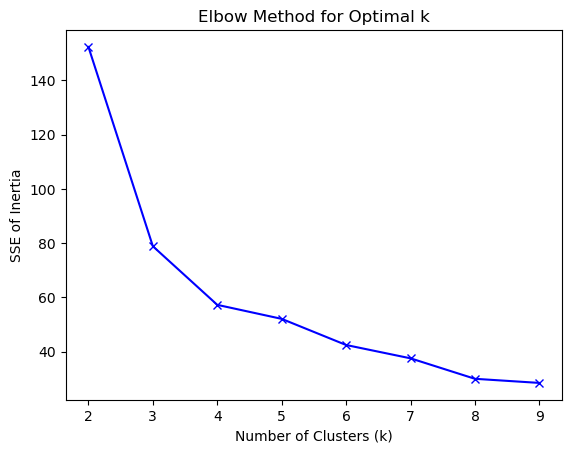

silhouette_score: 0.5511916046195919


<Figure size 640x480 with 0 Axes>

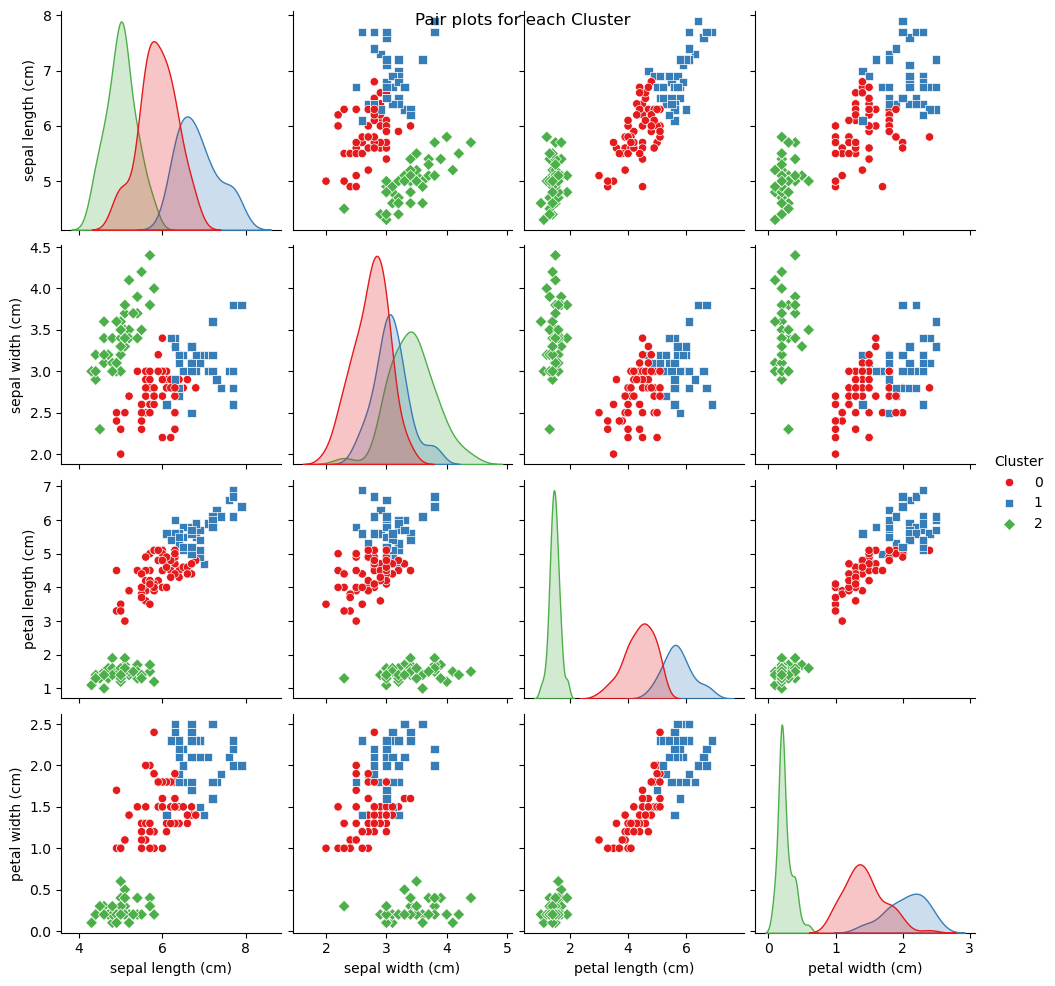

In [ ]:
df, y = load_data() 

k_range = range(2, 10)

sse_values = find_k_value(df, k_range=k_range)

kmeans = k_means_clustering(df, k=3)

labels = evaluate_model(kmeans, df)

df['Cluster'] = labels

pair_plots(df)

